# Cadenas de Markov 
En esta práctica aprenderemos a simular Cadenas de Markov y con ello analizaremos el comportamiento de varios ejemplos.

**Operaciones con Matrices en Python**

El modulo de algebra lineal de numpy nos ofrece una gran cantidad de rutinas para trabajar con matrices y vectores. La primera función que usaremos será  ``np.linalg.matrix_power()`` , la cual nos ayudará a elevar una matriz A a la potencia n. Para llevar a cabo esta operación simplemente hay que llamar a la función de la siguiente manera:

In [1]:
'''np.linalg.matrix_power(A,n)'''

'np.linalg.matrix_power(A,n)'

Otra función que nos será de utilidad es ``np.dot()``, la cual podemos usar para calcular productos entre matrices. En particular nosotros la usaremos para calcular el producto de un vector, v, con una matriz, A. Para llevar a cabo esta operación simplemente hay que llamar a la función de la siguiente manera:

In [2]:
'''np.dot(v,A)'''

'np.dot(v,A)'

Recordemos que las dimensiones importan a la hora de llevar a cabo el producto. Veamos que la función ``np.dot()`` respeta esto:

## Ejercicio 1: 
Escribe las matrices faltantes como un arreglo en Python y eleva todas las matrices a la potencia $n$ con $n=10,100,1000$
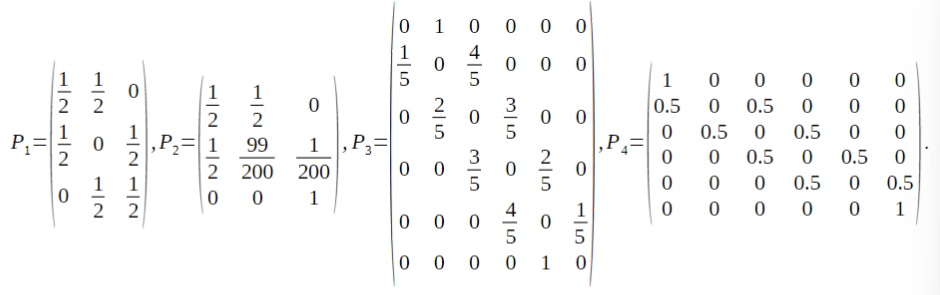

In [3]:
#Importamos la libreria requerida
import numpy as np
import random

In [4]:
''' Escribimos las matrices de arriba '''
'''P_1'''
p1 = np.array([[1/2,1/2,0],
              [1/2,0,1/2],
              [0,1/2,1/2]])
'''P_2'''
p2 = np.array([[1/2,1/2,0],
               [1/2,99/200,1/200],
               [0,0,1]])
'''P_3'''
p3 = np.array([[0,1,0,0,0,0],
               [1/5,0,4/5,0,0,0],
               [0,2/5,0,3/5,0,0],
               [0,0,3/5,0,2/5,0],
               [0,0,0,4/5,0,1/5],
               [0,0,0,0,1,0]])
'''P_4'''
p4 = np.array([[1,0,0,0,0,0],
              [0.5,0,0.5,0,0,0],
              [0,0.5,0,0.5,0,0],
              [0,0,0.5,0,0.5,0],
              [0,0,0,0.5,0,0.5],
              [0,0,0,0,0,1]])

In [6]:
''' con ayuda de la función np.linalg.matrix_power() hacemos el producto de matrices solicitados'''
valores_p = [p1,p2,p3,p4]

for value in valores_p:
    print('Impresión de Productos de Matrices: ')
    print(np.linalg.matrix_power(value,10))
    print('------')
    print(np.linalg.matrix_power(value,100))
    print('------')
    print(np.linalg.matrix_power(value,1000))

Impresión de Productos de Matrices: 
[[0.33398438 0.33300781 0.33300781]
 [0.33300781 0.33398438 0.33300781]
 [0.33300781 0.33300781 0.33398438]]
------
[[0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]]
------
[[0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]]
Impresión de Productos de Matrices: 
[[0.49010857 0.48766415 0.02222728]
 [0.48766415 0.48523193 0.02710392]
 [0.         0.         1.        ]]
------
[[0.39147009 0.38951763 0.21901228]
 [0.38951763 0.38757491 0.22290745]
 [0.         0.         1.        ]]
------
[[0.04137724 0.04117087 0.91745189]
 [0.04117087 0.04096553 0.9178636 ]
 [0.         0.         1.        ]]
Impresión de Productos de Matrices: 
[[0.06438963 0.         0.62877901 0.         0.30683136 0.        ]
 [0.         0.31590124 0.         0.62273249 0.         0.06136627]
 [0.0628779  0.         0.62575585 0.         0.31136625 0.        ]


## Ejercicio 2:
Haz una función que simule un estado dado una distribución de una cadena de Markov considerando una distribución inicial. $$v=(x_1 ,x_2 ,...,x_n)$$ Si numeramos los estados de la cadena comenzando con 0 la idea es exactamente la misma que cuando programaron el dado cargado en la práctica 10. Su función debe recibir: 
- Un vector de probabilidades cuya suma sea 1 

Debe regresar de manera aleatoria (con la probabilidad de elección correspondiente) una de las etiquetas de los estados.

In [37]:
'''Aquí programamos una función que te regresa de forma aleatoria la etiqueta de uno de los estados
Recordemos que si te la función te regresa al 0 se refiere al estado 1 debido a como funciona Python'''
def SimulacionEstado(vector):
    num_aleatorio = random.uniform(0,1)
    acumulada = 0
    for i, probabilidad in enumerate(vector):
        acumulada += probabilidad
        if num_aleatorio <= acumulada:
            return i 

In [38]:
'''Probando la función de arriba con un vector de probabilidades'''
''' Al correr esta celda, se puede regresar el 0, 1 ó 2. Estados disponibles'''
vector_de_probabilidad = [1/2,1/4,1/4]
SimulacionEstado(vector_de_probabilidad)

1

Idea para simular una cadena de Markov Necesitamos generar una sucesión $\{x_0 ,x_1 ,x_2 ,...,x_N\}$ dado un espacio de estados $E$.
Supongamos un espacio de estados $E=0,1,2$ $\pi=\left(\frac{1}{3},\frac{1}{3},\frac{1}{3}\right)$

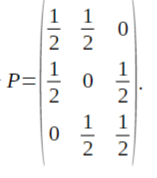

1. Simulamos $x_0$. Para esto necesitamos el vector de distribución inicial $\pi=\left(\frac{1}{3},\frac{1}{3},\frac{1}{3}\right)$

Escogemos un estado aleatorio con la función anterior y $π$. Listo! tenemos $x_0$ supongamos que $x_0 =2$.
2. Simulamos $x_1$. Una cadena de Markov depende del estado en que estuve antes, entonces tenemos que utilizar la matriz de trasición y fijarnos en el renglón del estado en que estabamos. 
$$P[2,:]=\left(0,\frac{1}{2},\frac{1}{2}\right)$$
Escogemos un estado aleatorio con la función anterior y $P[2,:]$. Listo! Repetimos... hasta n.

In [39]:
#distribución inicial. Recordamos que p1 es la matriz P ilustrada arriba
pi = [1/3,1/3,1/3]
#Mandamos a llamar la función programada arriba y la almacenamos en la variable x_0
x_0 = SimulacionEstado(pi)
'''Ya usando un ciclo for. Número de iteraciones para el valor n'''
n = 1000
x_n = x_0
listaX = [x_0]
for i in range(n):
    x_n = SimulacionEstado(p1[x_n])
    listaX.append(x_n)
print(listaX)

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 2, 2, 2, 1, 0, 1, 2, 1, 0, 0, 0, 0, 1, 2, 1, 2, 1, 0, 0, 1, 0, 1, 0, 0, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 0, 1, 0, 0, 1, 2, 2, 1, 2, 1, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 0, 1, 2, 1, 2, 2, 2, 2, 1, 0, 1, 0, 0, 1, 2, 2, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 2, 2, 1, 2, 1, 0, 1, 2, 2, 1, 0, 1, 0, 1, 2, 1, 0, 0, 1, 2, 1, 0, 0, 0, 1, 0, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 2, 1, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 2, 2, 2, 1, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 1, 2, 2, 1, 0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 0, 0, 1, 2, 2, 2, 1, 2, 2, 1, 0, 0, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 2, 1, 2, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 0, 1, 2, 2, 1, 0, 1, 2, 

## Ejercicio 3: 
En este ejercicio programarán dos funciones que simule una cadena de Markov y los estados que va tomando en cada iteración. La diferencia entre estas funciones será el criterio de paro. 
- La primera función deberá hacer: :
a. N iteraciones de la cadena de markov y la deberá recibir como parámetro. 
b. Regresar la lista de los estados que recorrió.
- Mientras que la segunda función: 
1. deberá correr hasta que la cadena tome un estado e dado. Deberá recibir la etiqueta del estado al que se quiere llegar, y un número máximo de iteraciones, MaxIter , en caso de que nunca se alcance el estado deseado. 

Ambas funciones deben recibir **dos parámetros correspondientes a la cadena**. 
- El primer parámetro es deberá ser la matriz de transición de la cadena, $P$. 
- El segundo parámetro deberá ser la distribución inicial de la cadena, $\Pi_0$. 

In [40]:
''' Primer función solicitada, te regresa la lista de estados que recorrió '''
def simulacionCadenaMarkov(matrizT, distribucionI, n):
    x_0 = SimulacionEstado(distribucionI)
    x_n = x_0
    listaEstados = [x_0]
    for i in range(n):
        x_n = SimulacionEstado(matrizT[x_n])
        listaEstados.append(x_n)
    return listaEstados
'''Aquí se prueba la función con una distribución pi y se manda a imprimir'''
print(simulacionCadenaMarkov(p1,pi,1000))
print('---------------------')
'''Otra simulación con una distribución inicial distinta y una matriz de transición diferente'''
pi_4 = [1/4, 1/4, 1/2]
print(simulacionCadenaMarkov(p2,pi_4,1000))
print('---------------------')
'''Otra simulación con una distribución inicial distinta y una matriz de transición diferente'''
pi_2 = [1/6, 1/6 , 1/6 , 1/6 , 1/6 , 1/6 ]
print(simulacionCadenaMarkov(p3, pi_2, 1000))
print('---------------------')
'''Otra simulación con una distribución inicial distinta y una matriz de transición diferente'''
pi_3 = [1/2, 1/3 , 1/24 , 1/24 , 1/24 , 1/24 ]
print(simulacionCadenaMarkov(p4, pi_3, 1000))
print('---------------------')

[1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 2, 1, 2, 1, 0, 1, 0, 0, 0, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 0, 1, 0, 1, 2, 2, 1, 0, 1, 2, 2, 1, 0, 1, 0, 1, 2, 2, 1, 2, 1, 0, 1, 2, 1, 2, 2, 1, 2, 1, 0, 0, 1, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 2, 2, 1, 0, 1, 2, 1, 0, 0, 0, 1, 0, 1, 2, 2, 1, 0, 0, 1, 2, 1, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 1, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 2, 1, 2, 1, 0, 0, 1, 2, 2, 1, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 0, 0, 0, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 1, 0, 0, 1, 0, 0, 1, 2, 1, 0, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 1, 0, 1, 0, 1, 2, 1, 0, 0, 0, 0, 1, 2, 2, 1, 0, 1, 0, 1, 2, 2, 2, 1, 0, 1, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 1, 0, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 0, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 0, 0, 1, 2, 2, 2, 2, 1, 

In [41]:
''' Segunda función solicitada'''
def SimulacionCadenaV2(matrizT, distribucionI, max_iteraciones, tope):
    x_0 = SimulacionEstado(distribucionI)
    x_n = x_0
    listaEstados = [x_0]
    contador = 0
    while listaEstados[-1] != tope and contador <= max_iteraciones:
        x_n = SimulacionEstado(matrizT[x_n])
        listaEstados.append(x_n)
        contador += 1
    return listaEstados

In [42]:
'''Aquí se prueba la función programada arriba con una distribución pi y se manda a imprimir'''
print(SimulacionCadenaV2(p1,pi,1000, 1))
print('---------------------')
'''Aquí se prueba la función programada arriba con una distribución pi y se manda a imprimir'''
print(SimulacionCadenaV2(p2,pi,10, 0))
print('---------------------')
'''Aquí se prueba la función programada arriba con una distribución pi y se manda a imprimir'''
print(SimulacionCadenaV2(p2,pi,1000000, 2))

[2, 1]
---------------------
[1, 0]
---------------------
[1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,

## Ejercicio 4:
Prueba la función del ejercicio anterior con las matrices del ejercicio 1. Prueba cada caso con distribuciones iniciales aleatorias usando las siguientes lineas de código:

In [43]:
#Generamos n uniformes(0, 1), donde n corresponde al numero de estados. 
Pi_1  = np.random.random(len(p1[0])) #Dividimos al vector entre su suma y asi el vector es una distribución de probabilidad.
Pi_1 /= np.sum(Pi_1)
print(SimulacionCadenaV2(p1,Pi_1,100000,2))

[2]


In [44]:
Pi_2  = np.random.random(len(p2[0]))
Pi_2 /= np.sum(Pi_2)
print(SimulacionCadenaV2(p2,Pi_2,100000,2))

[0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 

In [45]:
Pi_3  = np.random.random(len(p3[0]))
Pi_3 /= np.sum(Pi_3)
print(SimulacionCadenaV2(p2,Pi_2,100000,1))

[0, 0, 1]


In [46]:
Pi_4  = np.random.random(len(p4[0]))
Pi_4 /= np.sum(Pi_4)
print(SimulacionCadenaV2(p4,Pi_4,100000,5))

[1, 2, 3, 2, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

Usa la primera función del ejercicio anterior con 100 iteraciones. Finalmente, grafica el vector de los estados recorridos por la cadena contra el tiempo.

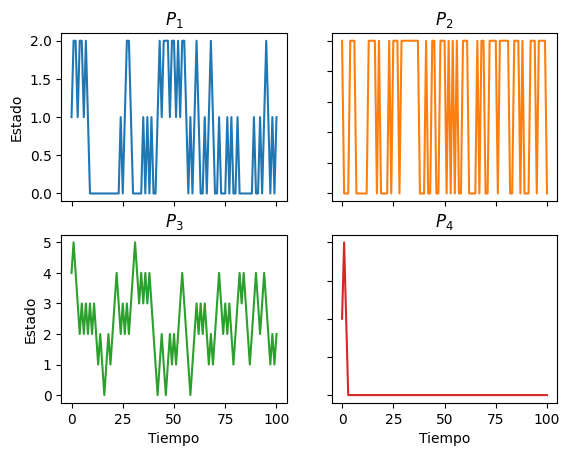

In [53]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(range(101), simulacionCadenaMarkov(p1,Pi_1,100))
axs[0, 0].set_title('$P_1$')
axs[0, 1].plot(range(101), simulacionCadenaMarkov(p2,Pi_2,100), 'tab:orange')
axs[0, 1].set_title('$P_2$')
axs[1, 0].plot(range(101), simulacionCadenaMarkov(p3,Pi_3,100), 'tab:green')
axs[1, 0].set_title('$P_3$')
axs[1, 1].plot(range(101), simulacionCadenaMarkov(p4,Pi_4,100), 'tab:red')
axs[1, 1].set_title('$P_4$')

for ax in axs.flat:
    ax.set(xlabel='Tiempo', ylabel='Estado')
for ax in axs.flat:
    ax.label_outer()

## Ejercicio 5: 
Podemos aproximar la probabilidad de que la cadena se encuentre en cada estado después de muchas iteraciones usando la distribución inicial $\Pi_0$ y la matriz de transición $P$, es llamada la distribución límite. Para ello basta hacer el producto $\Pi_0P^n$ para valores de n grandes. Haz ese producto para cada matriz de transición utilizando $n=1000$ y diferentes tres distribuciones iniciales generadas de manera aleatoria. ¿La elección de distribución inicial afecta en algo?

In [57]:
n = 1000
def Distribucion_aleatoria():
    x_0 = np.random.uniform(0,1)
    x_1 = np.random.uniform(0,1)
    while x_0 + x_1 > 1:
        x_0 = np.random.uniform(0,1)
        x_1 = np.random.uniform(0,1)
    x_2 = 1 - (x_0 + x_1)
    return [x_0,x_1,x_2]
def ditribucionLimite(matrizT,distribucionI,n):
    return np.dot(distribucionI,np.linalg.matrix_power(matrizT,n))
dist_aleatoria1 = Distribucion_aleatoria()
dist_aleatoria2 = Distribucion_aleatoria()
dist_aleatoria3 = Distribucion_aleatoria()
print(' Matriz 1 con la distribucion 1  su dist limite es: ',ditribucionLimite(p1,dist_aleatoria1,n))
print('Matriz 1 con la distribucion 2 su dist limite es: ',ditribucionLimite(p1,dist_aleatoria2,n))
print('Matriz 1 con la distribucion 3 su dist limite es: ',ditribucionLimite(p1,dist_aleatoria3,n))
print('Matriz 2 con la distribucion 1  su dist limite es: ',ditribucionLimite(p2,dist_aleatoria1,n))
print('Matriz 2 con la distribucion 2 su dist limite es: ',ditribucionLimite(p2,dist_aleatoria2,n))
print('Matriz 2 con la distribucion 3 su dist limite es: ',ditribucionLimite(p2,dist_aleatoria3,n))

 Matriz 1 con la distribucion 1  su dist limite es:  [0.33333333 0.33333333 0.33333333]
Matriz 1 con la distribucion 2 su dist limite es:  [0.33333333 0.33333333 0.33333333]
Matriz 1 con la distribucion 3 su dist limite es:  [0.33333333 0.33333333 0.33333333]
Matriz 2 con la distribucion 1  su dist limite es:  [0.0357106 0.0355325 0.9287569]
Matriz 2 con la distribucion 2 su dist limite es:  [0.04101275 0.0408082  0.91817905]
Matriz 2 con la distribucion 3 su dist limite es:  [0.01527392 0.01519774 0.96952834]
